In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold   
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing

#Modelling and Accuracy metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
from math import sqrt

## reading and understanding data

In [2]:
dframe = pd.read_csv(r'C:\Users\Manvi Katiyar\H2HBABBA3175.csv')

In [3]:
dframe.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,CCU013,KRAFT F systems,2019-06-28 00:00:00,2019.0,1.929357e+09,2019-05-21,20190521,20190521,20190521.0,USD,RV,1.0,NaN,17716.93,20190521.0,NAX2,1.929357e+09,0
1,U001,0200769623,WAL-MAR foundation,2019-11-08 00:00:00,2019.0,1.930056e+09,2019-10-29,20191027,20191029,20191113.0,USD,RV,1.0,NaN,11204.08,20191029.0,NAH4,1.930056e+09,0
2,U001,0200792293,UNIFIE,2020-02-27 00:00:00,2020.0,1.930514e+09,2020-02-12,20200211,20200212,20200227.0,USD,RV,1.0,NaN,37962.09,20200212.0,NAA8,1.930514e+09,0
3,U001,0200769623,WAL-MAR us,2019-07-05 00:00:00,2019.0,1.929531e+09,2019-06-24,20190622,20190624,20190709.0,USD,RV,1.0,NaN,1355.36,20190624.0,NAH4,1.929531e+09,0
4,U001,0200769623,WAL-MAR trust,2019-04-02 00:00:00,2019.0,1.928978e+09,2019-03-17,20190316,20190317,20190401.0,USD,RV,1.0,NaN,50624.54,20190317.0,NAH4,1.928978e+09,0


In [4]:
dframe.shape

(50000, 19)

In [5]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [6]:
dframe.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,5.000000e+04,5.000000e+04,4.999000e+04,50000.000000
mean,2019.306020,2.012518e+09,2.019351e+07,2.019354e+07,2.019369e+07,1.0,NaN,3.257270e+04,2.019354e+07,2.011020e+09,0.200000
std,0.460843,2.956767e+08,4.496036e+03,4.482758e+03,4.472568e+03,0.0,NaN,3.965776e+04,4.483714e+03,2.760887e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018103e+07,2.018111e+07,1.0,NaN,1.700000e-01,2.018103e+07,1.928502e+09,0.000000
25%,2019.000000,1.929341e+09,2.019051e+07,2.019051e+07,2.019052e+07,1.0,NaN,4.896910e+03,2.019051e+07,1.929341e+09,0.000000
50%,2019.000000,1.929976e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,1.765153e+04,2.019091e+07,1.929976e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,4.713705e+04,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,1.011888e+06,2.020052e+07,2.960635e+09,1.000000


In [7]:
##checking number of null values in dataframe
dframe.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                   10
isOpen                        0
dtype: int64

### null imputation

In [9]:
#looking at columns with null value
[col for col in dframe.columns if dframe[col].isnull().sum()>0]

['clear_date', 'area_business', 'invoice_id']

In [13]:
dframe

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,CCU013,KRAFT F systems,2019-06-28 00:00:00,2019.0,1.929357e+09,2019-05-21,20190521,20190521,20190521.0,USD,RV,1.0,17716.93,20190521.0,NAX2,1.929357e+09,0
1,U001,0200769623,WAL-MAR foundation,2019-11-08 00:00:00,2019.0,1.930056e+09,2019-10-29,20191027,20191029,20191113.0,USD,RV,1.0,11204.08,20191029.0,NAH4,1.930056e+09,0
2,U001,0200792293,UNIFIE,2020-02-27 00:00:00,2020.0,1.930514e+09,2020-02-12,20200211,20200212,20200227.0,USD,RV,1.0,37962.09,20200212.0,NAA8,1.930514e+09,0
3,U001,0200769623,WAL-MAR us,2019-07-05 00:00:00,2019.0,1.929531e+09,2019-06-24,20190622,20190624,20190709.0,USD,RV,1.0,1355.36,20190624.0,NAH4,1.929531e+09,0
4,U001,0200769623,WAL-MAR trust,2019-04-02 00:00:00,2019.0,1.928978e+09,2019-03-17,20190316,20190317,20190401.0,USD,RV,1.0,50624.54,20190317.0,NAH4,1.928978e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200759082,INGL corp,NaN,2020.0,1.930586e+09,2020-03-01,20200301,20200301,20200316.0,USD,RV,1.0,152137.92,20200301.0,NAA8,1.930586e+09,1
49996,U001,0200759878,SA corp,2019-12-24 00:00:00,2019.0,1.930246e+09,2019-12-08,20191207,20191208,20191223.0,USD,RV,1.0,14257.87,20191208.0,NAH4,1.930246e+09,0
49997,U001,0200769623,WAL-MAR associates,2020-02-11 00:00:00,2020.0,1.930462e+09,2020-02-01,20200131,20200201,20200216.0,USD,RV,1.0,33912.01,20200201.0,NAH4,1.930462e+09,0
49998,U001,0200779719,FOOD 4 llc,2019-10-10 00:00:00,2019.0,1.929915e+09,2019-09-25,20190924,20190925,20191010.0,USD,RV,1.0,14780.25,20190925.0,NAA8,1.929915e+09,0


In [10]:
#finding null values in 'area_business'
dframe[dframe['area_business'].isnull()].shape

(50000, 19)

In [ ]:
#dropping the whole column as it has only null values
dframe.drop(['area_business'],axis = 1,inplace=True)

In [14]:
#finding the null values in 'invoive_id'
dframe[dframe['invoice_id'].isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
4130,CA02,0140106054,TREE trust,2019-05-31 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190307,20190317.0,CAD,X2,1.0,1751.14,20190307.0,CA10,NaN,0
4782,CA02,0140104429,COSTCO foundation,2019-05-22 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190322,20190401.0,CAD,X2,1.0,5353.20,20190322.0,CA10,NaN,0
7798,CA02,0140104429,COSTCO co,2019-05-02 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190227,20190309.0,CAD,X2,1.0,52992.00,20190227.0,CA10,NaN,0
14162,CA02,0140104409,LOB,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20181030,20181109.0,CAD,X2,1.0,383.64,20181030.0,CA10,NaN,0
18989,CA02,0140104429,COSTCO us,2019-07-16 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190227,20190309.0,CAD,X2,1.0,42393.60,20190227.0,CA10,NaN,0
21169,CA02,0100030194,AMAZO in,2019-05-23 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190308,20190318.0,CAD,X2,1.0,2205.70,20190308.0,CA10,NaN,0
26672,CA02,0140104409,LOB co,2019-05-08 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190220,20190302.0,CAD,X2,1.0,14172.84,20190220.0,CA10,NaN,0
32994,CA02,0140104225,SAVE-ON- in,2019-05-02 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190220,20190302.0,CAD,X2,1.0,3620.16,20190220.0,CA10,NaN,0
40325,CA02,0140104409,LOB associates,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190319,20190329.0,CAD,X2,1.0,179.20,20190319.0,CA10,NaN,0
46002,CA02,0140104429,COSTCO,2019-05-02 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190227,20190309.0,CAD,X2,1.0,52992.00,20190227.0,CA10,NaN,0


In [15]:
#dropping rows having null values in 'invoice_id' column
dframe = dframe[dframe.invoice_id.isnull()==False]

In [16]:
#unique values in 'invoice_id'
dframe['invoice_id'].nunique()

48841

### removal of duplicate columns / columns with one constant value

In [17]:
##to see columns with constant values
def remove_constant_value_features(dframe):
    return [e for e in dframe.columns if dframe[e].nunique() <=1]

In [18]:
##to see and drop column which have a single constant value throughout the column
drop_column = remove_constant_value_features(dframe)
drop_column

['document type', 'posting_id']

In [19]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49990 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           49990 non-null  object 
 1   cust_number             49990 non-null  object 
 2   name_customer           49990 non-null  object 
 3   clear_date              39990 non-null  object 
 4   buisness_year           49990 non-null  float64
 5   doc_id                  49990 non-null  float64
 6   posting_date            49990 non-null  object 
 7   document_create_date    49990 non-null  int64  
 8   document_create_date.1  49990 non-null  int64  
 9   due_in_date             49990 non-null  float64
 10  invoice_currency        49990 non-null  object 
 11  document type           49990 non-null  object 
 12  posting_id              49990 non-null  float64
 13  total_open_amount       49990 non-null  float64
 14  baseline_create_date    49990 non-null

In [20]:
dframe = dframe.drop(drop_column,axis=1)

In [21]:
dframe.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [22]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49990 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           49990 non-null  object 
 1   cust_number             49990 non-null  object 
 2   name_customer           49990 non-null  object 
 3   clear_date              39990 non-null  object 
 4   buisness_year           49990 non-null  float64
 5   doc_id                  49990 non-null  float64
 6   posting_date            49990 non-null  object 
 7   document_create_date    49990 non-null  int64  
 8   document_create_date.1  49990 non-null  int64  
 9   due_in_date             49990 non-null  float64
 10  invoice_currency        49990 non-null  object 
 11  total_open_amount       49990 non-null  float64
 12  baseline_create_date    49990 non-null  float64
 13  cust_payment_terms      49990 non-null  object 
 14  invoice_id              49990 non-null

In [24]:
dframe.shape

(49990, 16)

In [25]:
#Dropping document_create_date.1 as it is duplicate of document_create_date
dframe.drop('document_create_date.1',axis=1,inplace=True)

In [27]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49990 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         49990 non-null  object 
 1   cust_number           49990 non-null  object 
 2   name_customer         49990 non-null  object 
 3   clear_date            39990 non-null  object 
 4   buisness_year         49990 non-null  float64
 5   doc_id                49990 non-null  float64
 6   posting_date          49990 non-null  object 
 7   document_create_date  49990 non-null  int64  
 8   due_in_date           49990 non-null  float64
 9   invoice_currency      49990 non-null  object 
 10  total_open_amount     49990 non-null  float64
 11  baseline_create_date  49990 non-null  float64
 12  cust_payment_terms    49990 non-null  object 
 13  invoice_id            49990 non-null  float64
 14  isOpen                49990 non-null  int64  
dtypes: float64(6), int6

# preprocessing

### conversion to datetime format

In [28]:
#Converting all the date columns into datetime format
dframe["document_create_date"]= pd.to_datetime(dframe["document_create_date"], format="%Y%m%d")
dframe["due_in_date"]= pd.to_datetime(dframe["due_in_date"], format="%Y%m%d")
dframe["baseline_create_date"]= pd.to_datetime(dframe["baseline_create_date"], format="%Y%m%d")
dframe['clear_date'] = pd.to_datetime(dframe['clear_date']).dt.date
dframe['clear_date'] = pd.to_datetime(dframe['clear_date'])
dframe['posting_date']= pd.to_datetime(dframe['posting_date'])

In [29]:
dframe

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,CCU013,KRAFT F systems,2019-06-28,2019.0,1.929357e+09,2019-05-21,2019-05-21,2019-05-21,USD,17716.93,2019-05-21,NAX2,1.929357e+09,0
1,U001,0200769623,WAL-MAR foundation,2019-11-08,2019.0,1.930056e+09,2019-10-29,2019-10-27,2019-11-13,USD,11204.08,2019-10-29,NAH4,1.930056e+09,0
2,U001,0200792293,UNIFIE,2020-02-27,2020.0,1.930514e+09,2020-02-12,2020-02-11,2020-02-27,USD,37962.09,2020-02-12,NAA8,1.930514e+09,0
3,U001,0200769623,WAL-MAR us,2019-07-05,2019.0,1.929531e+09,2019-06-24,2019-06-22,2019-07-09,USD,1355.36,2019-06-24,NAH4,1.929531e+09,0
4,U001,0200769623,WAL-MAR trust,2019-04-02,2019.0,1.928978e+09,2019-03-17,2019-03-16,2019-04-01,USD,50624.54,2019-03-17,NAH4,1.928978e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200759082,INGL corp,NaT,2020.0,1.930586e+09,2020-03-01,2020-03-01,2020-03-16,USD,152137.92,2020-03-01,NAA8,1.930586e+09,1
49996,U001,0200759878,SA corp,2019-12-24,2019.0,1.930246e+09,2019-12-08,2019-12-07,2019-12-23,USD,14257.87,2019-12-08,NAH4,1.930246e+09,0
49997,U001,0200769623,WAL-MAR associates,2020-02-11,2020.0,1.930462e+09,2020-02-01,2020-01-31,2020-02-16,USD,33912.01,2020-02-01,NAH4,1.930462e+09,0
49998,U001,0200779719,FOOD 4 llc,2019-10-10,2019.0,1.929915e+09,2019-09-25,2019-09-24,2019-10-10,USD,14780.25,2019-09-25,NAA8,1.929915e+09,0


#### checking

In [30]:
#Document create date can never be after the due date so firstly checking for that rows and dropping them
dframe.drop(dframe[dframe['document_create_date'] > dframe['due_in_date']].index,inplace=True)

In [31]:
#Baseline create date can not be after the clear date so removing that rows which satisfies the condition that baseline create date date is after the clear date
dframe.drop(dframe[dframe['baseline_create_date'] > dframe['clear_date']].index,inplace=True)
dframe

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,CCU013,KRAFT F systems,2019-06-28,2019.0,1.929357e+09,2019-05-21,2019-05-21,2019-05-21,USD,17716.93,2019-05-21,NAX2,1.929357e+09,0
1,U001,0200769623,WAL-MAR foundation,2019-11-08,2019.0,1.930056e+09,2019-10-29,2019-10-27,2019-11-13,USD,11204.08,2019-10-29,NAH4,1.930056e+09,0
2,U001,0200792293,UNIFIE,2020-02-27,2020.0,1.930514e+09,2020-02-12,2020-02-11,2020-02-27,USD,37962.09,2020-02-12,NAA8,1.930514e+09,0
3,U001,0200769623,WAL-MAR us,2019-07-05,2019.0,1.929531e+09,2019-06-24,2019-06-22,2019-07-09,USD,1355.36,2019-06-24,NAH4,1.929531e+09,0
4,U001,0200769623,WAL-MAR trust,2019-04-02,2019.0,1.928978e+09,2019-03-17,2019-03-16,2019-04-01,USD,50624.54,2019-03-17,NAH4,1.928978e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200759082,INGL corp,NaT,2020.0,1.930586e+09,2020-03-01,2020-03-01,2020-03-16,USD,152137.92,2020-03-01,NAA8,1.930586e+09,1
49996,U001,0200759878,SA corp,2019-12-24,2019.0,1.930246e+09,2019-12-08,2019-12-07,2019-12-23,USD,14257.87,2019-12-08,NAH4,1.930246e+09,0
49997,U001,0200769623,WAL-MAR associates,2020-02-11,2020.0,1.930462e+09,2020-02-01,2020-01-31,2020-02-16,USD,33912.01,2020-02-01,NAH4,1.930462e+09,0
49998,U001,0200779719,FOOD 4 llc,2019-10-10,2019.0,1.929915e+09,2019-09-25,2019-09-24,2019-10-10,USD,14780.25,2019-09-25,NAA8,1.929915e+09,0


In [32]:
#Baseline create date can never be after the due date so firstly checking for that rows and dropping them
dframe.drop(dframe[dframe['baseline_create_date'] > dframe['due_in_date']].index,inplace=True)
dframe

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,CCU013,KRAFT F systems,2019-06-28,2019.0,1.929357e+09,2019-05-21,2019-05-21,2019-05-21,USD,17716.93,2019-05-21,NAX2,1.929357e+09,0
1,U001,0200769623,WAL-MAR foundation,2019-11-08,2019.0,1.930056e+09,2019-10-29,2019-10-27,2019-11-13,USD,11204.08,2019-10-29,NAH4,1.930056e+09,0
2,U001,0200792293,UNIFIE,2020-02-27,2020.0,1.930514e+09,2020-02-12,2020-02-11,2020-02-27,USD,37962.09,2020-02-12,NAA8,1.930514e+09,0
3,U001,0200769623,WAL-MAR us,2019-07-05,2019.0,1.929531e+09,2019-06-24,2019-06-22,2019-07-09,USD,1355.36,2019-06-24,NAH4,1.929531e+09,0
4,U001,0200769623,WAL-MAR trust,2019-04-02,2019.0,1.928978e+09,2019-03-17,2019-03-16,2019-04-01,USD,50624.54,2019-03-17,NAH4,1.928978e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200759082,INGL corp,NaT,2020.0,1.930586e+09,2020-03-01,2020-03-01,2020-03-16,USD,152137.92,2020-03-01,NAA8,1.930586e+09,1
49996,U001,0200759878,SA corp,2019-12-24,2019.0,1.930246e+09,2019-12-08,2019-12-07,2019-12-23,USD,14257.87,2019-12-08,NAH4,1.930246e+09,0
49997,U001,0200769623,WAL-MAR associates,2020-02-11,2020.0,1.930462e+09,2020-02-01,2020-01-31,2020-02-16,USD,33912.01,2020-02-01,NAH4,1.930462e+09,0
49998,U001,0200779719,FOOD 4 llc,2019-10-10,2019.0,1.929915e+09,2019-09-25,2019-09-24,2019-10-10,USD,14780.25,2019-09-25,NAA8,1.929915e+09,0


In [34]:
###grouping because of low number of occurences
for col in dframe.columns:
    if dframe[col].nunique()<= 12:
        print(dframe[col].value_counts())
        print('#########################')

U001    45180
CA02     3879
U013      559
U002      169
U005        9
U007        4
Name: business_code, dtype: int64
#########################
2019.0    34559
2020.0    15241
Name: buisness_year, dtype: int64
#########################
USD    45920
CAD     3880
Name: invoice_currency, dtype: int64
#########################
0    39839
1     9961
Name: isOpen, dtype: int64
#########################


In [35]:
# clubbing business_code with low occurance in dataset - to ensure model gets max information 
dframe['business_code'] = np.where(dframe['business_code'].isin(["U005", "U007"]),
                                    "Other_business_code",dframe['business_code'])

In [36]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49800 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         49800 non-null  object        
 1   cust_number           49800 non-null  object        
 2   name_customer         49800 non-null  object        
 3   clear_date            39839 non-null  datetime64[ns]
 4   buisness_year         49800 non-null  float64       
 5   doc_id                49800 non-null  float64       
 6   posting_date          49800 non-null  datetime64[ns]
 7   document_create_date  49800 non-null  datetime64[ns]
 8   due_in_date           49800 non-null  datetime64[ns]
 9   invoice_currency      49800 non-null  object        
 10  total_open_amount     49800 non-null  float64       
 11  baseline_create_date  49800 non-null  datetime64[ns]
 12  cust_payment_terms    49800 non-null  object        
 13  invoice_id      

In [37]:
#Changing all the amount to one currency
dframe['total_open_amount'] = np.where(dframe['invoice_currency'] == 'CAD',
                                           dframe['total_open_amount'] * 0.81,
                                           dframe['total_open_amount'])
dframe['total_open_amount']=dframe['total_open_amount'].astype(float)

In [38]:
#updating the currency in invoice_currency column
dframe['invoice_currency'].replace({'CAD':'USD'},inplace=True)

In [39]:
#dropping the invoice_currency column as it has constant value 'USD' now
dframe = dframe.drop(columns=['invoice_currency'])

In [40]:
dframe.tail(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
49990,U001,0200726979,BJ'S co,2020-03-02,2020.0,1.930537e+09,2020-02-15,2020-02-18,2020-03-01,540.55,2020-02-15,NAA8,1.930537e+09,0
49991,U001,0200353024,DECA us,2019-05-16,2019.0,1.929271e+09,2019-05-08,2019-05-08,2019-05-24,668.58,2019-05-01,NAM4,1.929271e+09,0
49992,U001,0200769623,WAL-MAR co,2019-06-18,2019.0,1.929409e+09,2019-06-01,2019-05-31,2019-06-16,1875.86,2019-06-01,NAH4,1.929409e+09,0
49993,U001,0200920735,ALBERT systems,NaT,2020.0,1.930682e+09,2020-03-22,2020-03-21,2020-04-06,74622.75,2020-03-22,NAA8,1.930682e+09,1
49994,U001,200769623,WAL-MAR co,2019-07-11,2019.0,1.929561e+09,2019-07-01,2019-06-30,2019-07-16,62398.47,2019-07-01,NAH4,1.929561e+09,0
49995,U001,0200759082,INGL corp,NaT,2020.0,1.930586e+09,2020-03-01,2020-03-01,2020-03-16,152137.92,2020-03-01,NAA8,1.930586e+09,1
49996,U001,0200759878,SA corp,2019-12-24,2019.0,1.930246e+09,2019-12-08,2019-12-07,2019-12-23,14257.87,2019-12-08,NAH4,1.930246e+09,0
49997,U001,0200769623,WAL-MAR associates,2020-02-11,2020.0,1.930462e+09,2020-02-01,2020-01-31,2020-02-16,33912.01,2020-02-01,NAH4,1.930462e+09,0
49998,U001,0200779719,FOOD 4 llc,2019-10-10,2019.0,1.929915e+09,2019-09-25,2019-09-24,2019-10-10,14780.25,2019-09-25,NAA8,1.929915e+09,0
49999,U001,0200705742,DOT foundation,2019-05-24,2019.0,1.929278e+09,2019-05-09,2019-05-08,2019-05-24,4610.09,2019-05-09,NAA8,1.929278e+09,0


In [41]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49800 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         49800 non-null  object        
 1   cust_number           49800 non-null  object        
 2   name_customer         49800 non-null  object        
 3   clear_date            39839 non-null  datetime64[ns]
 4   buisness_year         49800 non-null  float64       
 5   doc_id                49800 non-null  float64       
 6   posting_date          49800 non-null  datetime64[ns]
 7   document_create_date  49800 non-null  datetime64[ns]
 8   due_in_date           49800 non-null  datetime64[ns]
 9   total_open_amount     49800 non-null  float64       
 10  baseline_create_date  49800 non-null  datetime64[ns]
 11  cust_payment_terms    49800 non-null  object        
 12  invoice_id            49800 non-null  float64       
 13  isOpen          

In [42]:
dframe.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
dtype: object

### splitting into train and test dataset

In [45]:
##splitting based on if clear date == null -> test set and if clear date != null -> train set
t_rain = dframe[dframe.clear_date.isnull()==False]  
t_est = dframe[dframe.clear_date.isnull()] 

In [46]:
t_est.shape

(9961, 14)

In [47]:
t_rain.shape

(39839, 14)

In [48]:
##looking at number of unique values
t_rain.nunique()

business_code               5
cust_number              1363
name_customer            3956
clear_date                400
buisness_year               2
doc_id                  39011
posting_date              423
document_create_date      426
due_in_date               490
total_open_amount       35631
baseline_create_date      430
cust_payment_terms         65
invoice_id              39011
isOpen                      1
dtype: int64

In [54]:
#Dropping the coumn isOpen as now it is of no use
t_rain.drop(['isOpen'],axis=1,inplace=True)

In [55]:
t_est.drop(['isOpen'],axis=1,inplace=True)

In [56]:
t_rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39839 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         39839 non-null  object        
 1   cust_number           39839 non-null  object        
 2   name_customer         39839 non-null  object        
 3   clear_date            39839 non-null  datetime64[ns]
 4   buisness_year         39839 non-null  float64       
 5   doc_id                39839 non-null  float64       
 6   posting_date          39839 non-null  datetime64[ns]
 7   document_create_date  39839 non-null  datetime64[ns]
 8   due_in_date           39839 non-null  datetime64[ns]
 9   total_open_amount     39839 non-null  float64       
 10  baseline_create_date  39839 non-null  datetime64[ns]
 11  cust_payment_terms    39839 non-null  object        
 12  invoice_id            39839 non-null  float64       
dtypes: datetime64[ns

In [57]:
# we have no use of invoice id in our prediction so we will drop it
t_rain.drop('invoice_id',axis=1,inplace=True)

In [58]:
# we have no use of invoice id in our prediction so we will drop it
t_est.drop('invoice_id',axis=1,inplace=True)

In [61]:
t_est.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9961 entries, 5 to 49995
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9961 non-null   object        
 1   cust_number           9961 non-null   object        
 2   name_customer         9961 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9961 non-null   float64       
 5   doc_id                9961 non-null   float64       
 6   posting_date          9961 non-null   datetime64[ns]
 7   document_create_date  9961 non-null   datetime64[ns]
 8   due_in_date           9961 non-null   datetime64[ns]
 9   total_open_amount     9961 non-null   float64       
 10  baseline_create_date  9961 non-null   datetime64[ns]
 11  cust_payment_terms    9961 non-null   object        
dtypes: datetime64[ns](5), float64(3), object(4)
memory usage: 856.0+ KB


In [62]:
t_rain.shape,t_est.shape

((39839, 12), (9961, 12))

In [66]:
t_est = t_est.dropna(axis = 0, subset=['clear_date'])

In [67]:
t_est.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms


In [68]:
t_est.isnull().sum()

business_code           0.0
cust_number             0.0
name_customer           0.0
clear_date              0.0
buisness_year           0.0
doc_id                  0.0
posting_date            0.0
document_create_date    0.0
due_in_date             0.0
total_open_amount       0.0
baseline_create_date    0.0
cust_payment_terms      0.0
dtype: float64

### delay is our target here = clear date - due date

In [69]:
#Finding the delay column in days
t_rain['delay'] = (t_rain['clear_date'] - t_rain['due_in_date']).dt.days
t_rain

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay
0,U001,CCU013,KRAFT F systems,2019-06-28,2019.0,1.929357e+09,2019-05-21,2019-05-21,2019-05-21,17716.93,2019-05-21,NAX2,38
1,U001,0200769623,WAL-MAR foundation,2019-11-08,2019.0,1.930056e+09,2019-10-29,2019-10-27,2019-11-13,11204.08,2019-10-29,NAH4,-5
2,U001,0200792293,UNIFIE,2020-02-27,2020.0,1.930514e+09,2020-02-12,2020-02-11,2020-02-27,37962.09,2020-02-12,NAA8,0
3,U001,0200769623,WAL-MAR us,2019-07-05,2019.0,1.929531e+09,2019-06-24,2019-06-22,2019-07-09,1355.36,2019-06-24,NAH4,-4
4,U001,0200769623,WAL-MAR trust,2019-04-02,2019.0,1.928978e+09,2019-03-17,2019-03-16,2019-04-01,50624.54,2019-03-17,NAH4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200769623,WAL-MAR co,2019-07-11,2019.0,1.929561e+09,2019-07-01,2019-06-30,2019-07-16,62398.47,2019-07-01,NAH4,-5
49996,U001,0200759878,SA corp,2019-12-24,2019.0,1.930246e+09,2019-12-08,2019-12-07,2019-12-23,14257.87,2019-12-08,NAH4,1
49997,U001,0200769623,WAL-MAR associates,2020-02-11,2020.0,1.930462e+09,2020-02-01,2020-01-31,2020-02-16,33912.01,2020-02-01,NAH4,-5
49998,U001,0200779719,FOOD 4 llc,2019-10-10,2019.0,1.929915e+09,2019-09-25,2019-09-24,2019-10-10,14780.25,2019-09-25,NAA8,0


### sorting in ascending order based on posting date 

In [70]:
t_rain = t_rain.sort_values(by="posting_date")

In [71]:
t_rain

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay
13215,U001,0200749782,KROG foundation,2019-01-14,2019.0,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,86299.7500,2018-12-30,NAA8,0
7935,U001,0200735528,ASSOCIA in,2019-01-14,2019.0,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,59708.7100,2018-12-30,NAA8,0
2829,U001,0200769623,WAL-MAR,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,63.6000,2018-12-30,NAH4,-5
49449,U001,0200769623,WAL-MAR systems,2019-01-11,2019.0,1.928545e+09,2018-12-30,2018-12-30,2019-01-14,49078.5500,2018-12-30,NAH4,-3
48213,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,5433.6800,2018-12-30,NAH4,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,U001,0200230690,DECA co,2020-03-05,2020.0,1.930572e+09,2020-02-26,2020-02-26,2020-03-10,21.7200,2020-02-16,NAM4,-5
13117,U001,0200789344,INDIANH,2020-03-24,2020.0,1.930577e+09,2020-02-26,2020-02-27,2020-03-12,40721.5600,2020-02-26,NAA8,12
7156,CA02,0140106408,WAL-M associates,2020-03-17,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-03-09,19011.3156,2020-02-28,CA10,8
49280,CA02,0140105847,GORDON F,2020-03-13,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-03-16,781.4394,2020-03-06,CA10,-3


In [72]:
t_rain.shape

(39839, 13)

## Splitting Data

In [73]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test_initially,Y_train, Y_inter_test = train_test_split(t_rain.drop('delay', axis =1),t_rain['delay'],test_size=0.3,random_state=5,shuffle=False)

In [97]:
X_val,X_test,y_val,y_test = train_test_split(X_test_initially,Y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [98]:
X_train.shape,X_test_initially.shape,Y_train.shape,Y_test.shape

((27887, 12), (11952, 12), (27887,), (11952,))

In [100]:
 X_val.shape , X_test.shape , y_val.shape , y_test.shape

((5976, 12), (5976, 12), (5976,), (5976,))

## EDA

In [101]:
X_train.describe()

,buisness_year,doc_id,total_open_amount
count,27887.0,2.788700e+04,2.788700e+04
mean,2019.0,2.013537e+09,3.118554e+04
std,0.0,2.805417e+08,3.800961e+04
min,2019.0,1.928502e+09,6.200000e-01
25%,2019.0,1.928999e+09,4.394690e+03
50%,2019.0,1.929424e+09,1.697166e+04
75%,2019.0,1.929774e+09,4.549969e+04
max,2019.0,2.960586e+09,1.011888e+06


In [102]:
Y_train

13215    0
7935     0
2829    -5
49449   -3
48213   -5
        ..
21858    0
46649    1
49286    5
11151    0
39867    0
Name: delay, Length: 27887, dtype: int64

In [103]:
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

#### plotting graphs 

<AxesSubplot:xlabel='delay', ylabel='Density'>

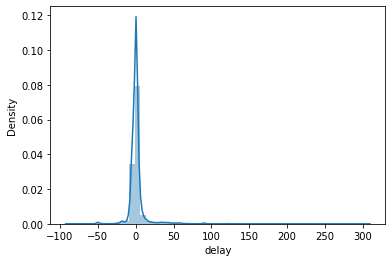

In [104]:
sns.distplot(Y_train)

<AxesSubplot:xlabel='delay', ylabel='doc_id'>

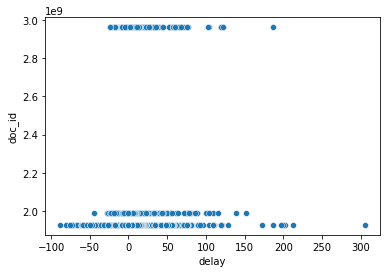

In [105]:
sns.scatterplot(data=X_train.merge(Y_train,on=X_train.index),x='delay',y='doc_id')

<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

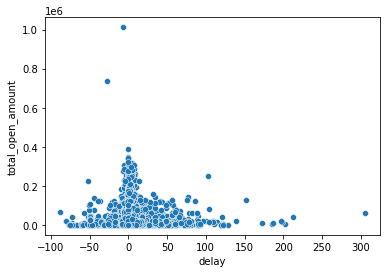

In [106]:
sns.scatterplot(data=X_train.merge(Y_train,on=X_train.index),x='delay',y='total_open_amount')

4.496351253442934


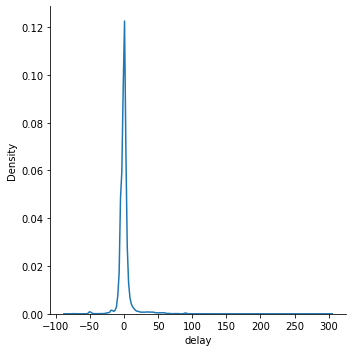

In [306]:
#Plotting the kde plot to check if the delay column is skewed or normally distributed
print(t_rain['delay'].skew())
sns.displot(t_rain['delay'],kind='kde',cut=0)

2.6294501848836624


<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

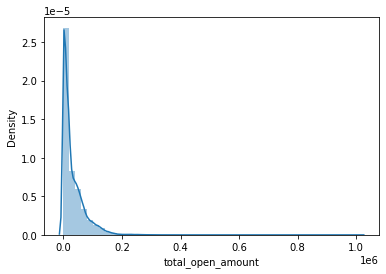

In [307]:
print(t_rain['total_open_amount'].skew())
sns.distplot(t_rain['total_open_amount'])

-0.11215967028552816


<AxesSubplot:ylabel='Density'>

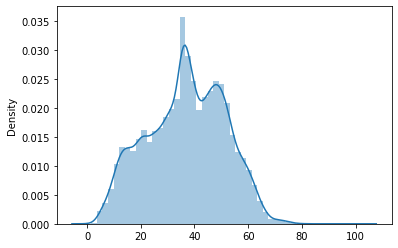

In [308]:
#A Box Cox transformation is a transformation of a non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.
p2 = stats.boxcox(t_rain['total_open_amount'])[0]
p3 = pd.Series(p2)
print(p3.skew())
sns.distplot(p2)

## Feature Engg

In [107]:
##to detect outliers
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

buisness_year             0.0000
doc_id               775327.0000
total_open_amount     41105.0001
dtype: float64


In [108]:
X_train['total_open_amount'] = pd.to_numeric(X_train['total_open_amount'])
X_train['doc_id'] = pd.to_numeric(X_train['doc_id'])

In [110]:
X_train.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

### label encoding

In [111]:
from sklearn.preprocessing import LabelEncoder
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_train['business_code'])
X_train['business_code_enc'] = business_code_encoder.transform(X_train['business_code'])
X_val['business_code_enc'] = business_code_encoder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_code_encoder.transform(X_test['business_code'])

In [112]:
X_train.drop(['business_code'], axis =1,inplace=True)
X_val.drop(['business_code'],axis=1 , inplace=True)
X_test.drop(['business_code'],axis=1 , inplace=True)

In [113]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27887 entries, 13215 to 39867
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           27887 non-null  object        
 1   name_customer         27887 non-null  object        
 2   clear_date            27887 non-null  datetime64[ns]
 3   buisness_year         27887 non-null  float64       
 4   doc_id                27887 non-null  float64       
 5   posting_date          27887 non-null  datetime64[ns]
 6   document_create_date  27887 non-null  datetime64[ns]
 7   due_in_date           27887 non-null  datetime64[ns]
 8   total_open_amount     27887 non-null  float64       
 9   baseline_create_date  27887 non-null  datetime64[ns]
 10  cust_payment_terms    27887 non-null  object        
 11  business_code_enc     27887 non-null  int32         
dtypes: datetime64[ns](5), float64(3), int32(1), object(3)
memory usage: 2.

#### converting to int to pass machine learning algorithms

#### function to encode more number of values

In [ ]:
# def thanos_snap(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [119]:
name_customer_encoder = LabelEncoder()
name_customer_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc'] = name_customer_encoder.transform(X_train['name_customer'])

In [120]:
# finding what are the new catagories in the validation set
diff = set(X_val['name_customer'])-set(name_customer_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    name_customer_encoder.classes_ = np.append(name_customer_encoder.classes_,items)

In [121]:

X_val['name_customer_enc'] = name_customer_encoder.transform(X_val['name_customer'])

In [122]:
# doing same thing for test also

diff2 = set(X_test['name_customer'])-set(name_customer_encoder.classes_)
for items in diff2:
    name_customer_encoder.classes_ = np.append(name_customer_encoder.classes_,items)

In [123]:
X_test['name_customer'] = name_customer_encoder.transform(X_test['name_customer'])

In [124]:
X_train ,X_val, X_test = thanos_snap(['name_customer'])

In [125]:
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(X_train['cust_number'])
X_train['cust_number_enc'] = cust_number_encoder.transform(X_train['cust_number'])

In [126]:
# finding what are the new catagories in the validation set
diff = set(X_val['cust_number'])-set(cust_number_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    cust_number_encoder.classes_ = np.append(cust_number_encoder.classes_,items)

In [127]:
X_val['cust_number_enc'] = cust_number_encoder.transform(X_val['cust_number'])

In [128]:
# doing same thing for test also

diff2 = set(X_test['cust_number'])-set(cust_number_encoder.classes_)
for items in diff2:
    cust_number_encoder.classes_ = np.append(cust_number_encoder.classes_,items)

In [129]:
X_test['cust_number'] = cust_number_encoder.transform(X_test['cust_number'])

In [130]:
X_train ,X_val, X_test = thanos_snap(['cust_number'])

In [141]:
X_train.dtypes

clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
due_in_date               datetime64[ns]
total_open_amount                float64
baseline_create_date      datetime64[ns]
business_code_enc                  int32
buisness_year_enc                  int32
posting_date_enc                   int32
name_customer_enc                  int32
cust_number_enc                    int32
cust_payment_terms_enc             int32
dtype: object

In [140]:
X_val.dtypes

clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
due_in_date               datetime64[ns]
total_open_amount                float64
baseline_create_date      datetime64[ns]
business_code_enc                  int32
buisness_year_enc                  int32
name_customer_enc                  int32
cust_number_enc                    int32
cust_payment_terms_enc             int32
dtype: object

In [137]:
cust_payment_terms_encoder = preprocessing.LabelEncoder()
X_train['cust_payment_terms_enc']= cust_payment_terms_encoder.fit_transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']= cust_payment_terms_encoder.fit_transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']= cust_payment_terms_encoder.fit_transform(X_test['cust_payment_terms'])

In [139]:
X_train.drop(['cust_payment_terms'], axis=1, inplace=True)
X_val.drop(['cust_payment_terms'], axis=1, inplace=True)
X_test.drop(['cust_payment_terms'], axis=1, inplace=True)

In [142]:
X_train['day_of_Baseline'] = X_train['baseline_create_date'].dt.day
X_train['month_of_Baseline'] = X_train['baseline_create_date'].dt.month
X_train['year_of_Baseline'] = X_train['baseline_create_date'].dt.year

X_val['day_of_Baseline'] = X_val['baseline_create_date'].dt.day
X_val['month_of_Baseline'] = X_val['baseline_create_date'].dt.month
X_val['year_of_Baseline'] = X_val['baseline_create_date'].dt.year


X_test['day_of_Baseline'] = X_test['baseline_create_date'].dt.day
X_test['month_of_Baseline'] = X_test['baseline_create_date'].dt.month
X_test['year_of_Baseline'] = X_test['baseline_create_date'].dt.year

In [143]:
X_train ,X_val, X_test = thanos_snap(['baseline_create_date'])

In [144]:
X_train['day_of_document_create'] = X_train['document_create_date'].dt.day
X_train['month_of_document_create'] = X_train['document_create_date'].dt.month
X_train['year_of_document_create'] = X_train['document_create_date'].dt.year

X_val['day_of_document_create'] = X_val['document_create_date'].dt.day
X_val['month_of_document_create'] = X_val['document_create_date'].dt.month
X_val['year_of_document_create'] = X_val['document_create_date'].dt.year


X_test['day_of_document_create'] = X_test['document_create_date'].dt.day
X_test['month_of_document_create'] = X_test['document_create_date'].dt.month
X_test['year_of_document_create'] = X_test['document_create_date'].dt.year

In [145]:
X_train ,X_val, X_test = thanos_snap(['document_create_date'])

In [146]:
X_train.dtypes

clear_date                  datetime64[ns]
buisness_year                      float64
doc_id                             float64
posting_date                datetime64[ns]
due_in_date                 datetime64[ns]
total_open_amount                  float64
business_code_enc                    int32
buisness_year_enc                    int32
posting_date_enc                     int32
name_customer_enc                    int32
cust_number_enc                      int32
cust_payment_terms_enc               int32
day_of_Baseline                      int64
month_of_Baseline                    int64
year_of_Baseline                     int64
day_of_document_create               int64
month_of_document_create             int64
year_of_document_create              int64
dtype: object

In [147]:
X_train['day_of_posting'] = X_train['posting_date'].dt.day
X_train['month_of_posting'] = X_train['posting_date'].dt.month
X_train['year_of_posting'] = X_train['posting_date'].dt.year

X_val['day_of_posting'] = X_val['posting_date'].dt.day
X_val['month_of_posting'] = X_val['posting_date'].dt.month
X_val['year_of_posting'] = X_val['posting_date'].dt.year


X_test['day_of_posting'] = X_test['posting_date'].dt.day
X_test['month_of_posting'] = X_test['posting_date'].dt.month
X_test['year_of_posting'] = X_test['posting_date'].dt.year

In [148]:
X_train ,X_val, X_test = thanos_snap(['posting_date'])

In [158]:
doc_id_encoder = LabelEncoder()
doc_id_encoder.fit(X_train['doc_id'])
X_train['doc_id_enc'] = doc_id_encoder.transform(X_train['doc_id'])

total_open_amount_encoder = LabelEncoder()
total_open_amount_encoder.fit(X_train['total_open_amount'])
X_train['total_open_amount_enc'] = total_open_amount_encoder.transform(X_train['total_open_amount'])

In [159]:
# finding what are the new catagories in the validation set
diff = set(X_val['doc_id'])-set(doc_id_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    doc_id_encoder.classes_ = np.append(doc_id_encoder.classes_,items)
    
# finding what are the new catagories in the validation set
diff = set(X_val['total_open_amount'])-set(total_open_amount_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    total_open_amount_encoder.classes_ = np.append(total_open_amount_encoder.classes_,items)

In [160]:
X_val['doc_id_enc'] = doc_id_encoder.transform(X_val['doc_id'])
X_val['total_open_amount_enc'] = total_open_amount_encoder.transform(X_val['total_open_amount'])

In [161]:
# doing same thing for test also

diff2 = set(X_test['doc_id'])-set(doc_id_encoder.classes_)
for items in diff2:
    doc_id_encoder.classes_ = np.append(doc_id_encoder.classes_,items)
                   
# doing same thing for test also

diff2 = set(X_test['total_open_amount'])-set(total_open_amount_encoder.classes_)
for items in diff2:
    total_open_amount_encoder.classes_ = np.append(total_open_amount_encoder.classes_,items)

In [162]:
X_test['doc_id'] = doc_id_encoder.transform(X_test['doc_id'])
X_test['total_open_amount'] = total_open_amount_encoder.transform(X_test['total_open_amount'])

In [163]:
X_train ,X_val, X_test = thanos_snap(['doc_id'])
X_train ,X_val, X_test = thanos_snap(['total_open_amount'])

In [ ]:
###########################################################################3

In [221]:
due_in_date_encoder = preprocessing.LabelEncoder()
X_train['due_in_date']= due_in_date_encoder.fit_transform(X_train['due_in_date'])
X_val['due_in_date']= due_in_date_encoder.fit_transform(X_val['due_in_date'])
X_test['due_in_date']= due_in_date_encoder.fit_transform(X_test['due_in_date'])

## Feature Selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

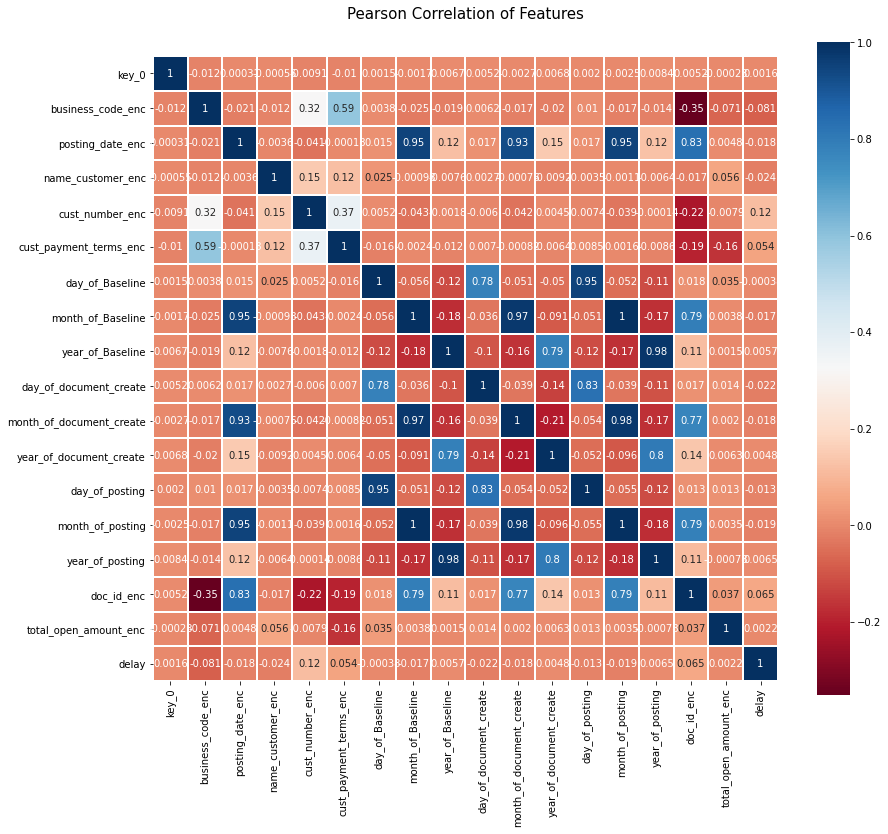

In [164]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(Y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [151]:
##buisness year gives null values in the graph , so we drop it !!
X_train.drop(['buisness_year'], axis=1, inplace=True)
X_val.drop(['buisness_year'], axis=1, inplace=True)
X_test.drop(['buisness_year'], axis=1, inplace=True)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

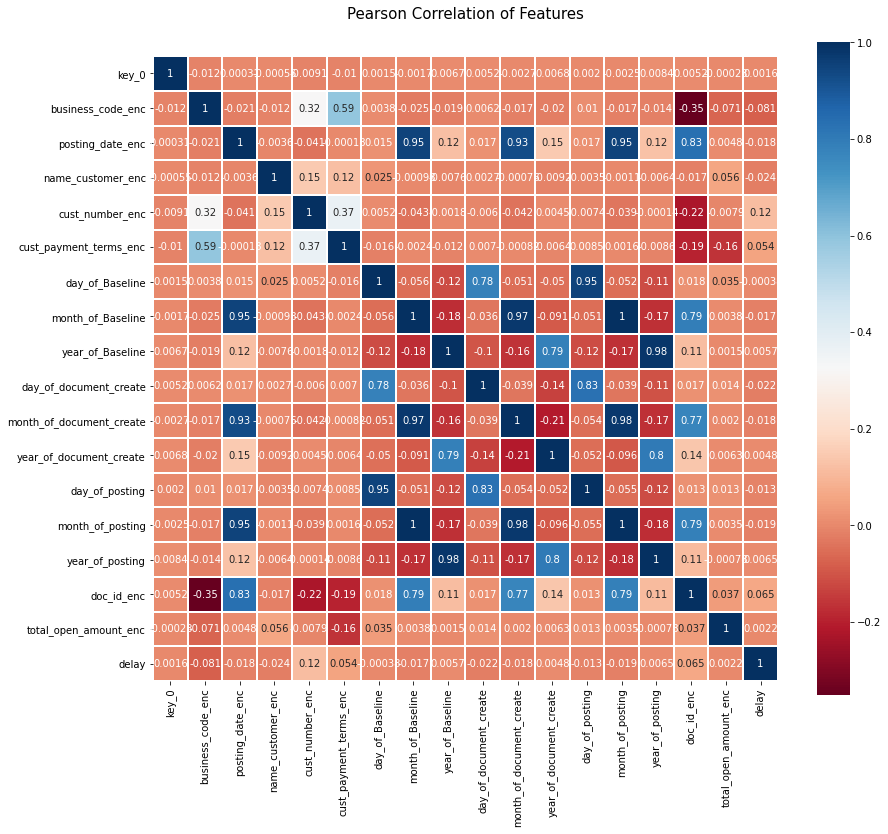

In [166]:
##Heatmap
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(Y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [210]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27887 entries, 13215 to 39867
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   clear_date                27887 non-null  int32
 1   due_in_date               27887 non-null  int32
 2   business_code_enc         27887 non-null  int32
 3   posting_date_enc          27887 non-null  int32
 4   name_customer_enc         27887 non-null  int32
 5   cust_number_enc           27887 non-null  int32
 6   cust_payment_terms_enc    27887 non-null  int32
 7   day_of_Baseline           27887 non-null  int64
 8   month_of_Baseline         27887 non-null  int64
 9   year_of_Baseline          27887 non-null  int64
 10  day_of_document_create    27887 non-null  int64
 11  month_of_document_create  27887 non-null  int64
 12  year_of_document_create   27887 non-null  int64
 13  day_of_posting            27887 non-null  int64
 14  month_of_posting          27887 no

In [230]:
X_train

,clear_date,due_in_date,business_code_enc,name_customer_enc,cust_number_enc,cust_payment_terms_enc,day_of_Baseline,month_of_Baseline,year_of_Baseline,day_of_document_create,month_of_document_create,year_of_document_create,day_of_posting,month_of_posting,year_of_posting,doc_id_enc,total_open_amount_enc
13215,6,9,2,1738,694,18,30,12,2018,29,12,2018,30,12,2018,63,22755
7935,6,9,2,205,658,18,30,12,2018,29,12,2018,30,12,2018,81,20517
2829,2,9,2,3289,737,30,30,12,2018,29,12,2018,30,12,2018,67,153
49449,4,9,2,3297,737,30,30,12,2018,30,12,2018,30,12,2018,158,18973
48213,2,9,2,3297,737,30,30,12,2018,29,12,2018,30,12,2018,47,6277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21858,241,293,2,1733,694,18,10,10,2019,9,10,2019,10,10,2019,24534,23547
46649,255,310,2,3179,585,11,10,10,2019,9,10,2019,10,10,2019,24562,1782
49286,257,308,2,2313,499,27,10,10,2019,9,10,2019,10,10,2019,24588,15532
11151,241,293,2,591,542,18,10,10,2019,8,10,2019,10,10,2019,24476,3517


In [231]:
##to find variance threshold
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [232]:
sel.variances_

array([4.56210175e+03, 6.60564435e+03, 3.64603872e-01, 1.29194136e+06,
       6.01480446e+04, 1.05021991e+02, 7.95504474e+01, 7.19371030e+00,
       4.81753038e-03, 7.82516440e+01, 7.23308602e+00, 7.08501982e-03,
       7.81316080e+01, 7.18678352e+00, 4.85304091e-03, 6.21451239e+07,
       5.33091216e+07])

## Modelling

### creating a base model

In [233]:
from sklearn.linear_model import LinearRegression 
base_model = LinearRegression() 
base_model.fit(X_train, Y_train)

LinearRegression()

In [235]:
y_predict = base_model.predict(X_val)

In [236]:
X_train.shape 

(27887, 17)

In [237]:
X_val.shape

(5976, 17)

##### after applying linear regression model , mean squared error

In [240]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

7.173464710595958

### Tree based model

In [241]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [242]:
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [244]:
y_predict2 = regressor.predict(X_val)

##### after applying decision tree regressor , mean squared error

In [246]:
mean_squared_error(y_val, y_predict2, squared=False)

7.078182694767675

,clear_date,due_in_date,business_code_enc,name_customer_enc,cust_number_enc,cust_payment_terms_enc,day_of_Baseline,month_of_Baseline,year_of_Baseline,day_of_document_create,month_of_document_create,year_of_document_create,day_of_posting,month_of_posting,year_of_posting,doc_id_enc,total_open_amount_enc
14628,4,13,2,3291,737,23,10,10,2019,8,10,2019,10,10,2019,24509,18334
13655,11,18,2,2553,884,18,10,10,2019,10,10,2019,10,10,2019,24626,2267
19245,9,9,0,3603,296,3,11,10,2019,10,10,2019,10,10,2019,33166,6358
11762,6,13,2,1187,676,12,10,10,2019,10,10,2019,10,10,2019,24620,18098
14042,9,13,2,2983,728,12,10,10,2019,10,10,2019,10,10,2019,24623,4379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9697,57,69,0,22,284,3,10,12,2019,10,12,2019,10,12,2019,33166,4252
39418,53,74,2,3290,737,23,10,12,2019,9,12,2019,10,12,2019,24629,5614
4557,54,78,0,3419,292,3,19,12,2019,10,12,2019,10,12,2019,33166,20382
23653,56,74,2,116,485,12,10,12,2019,5,12,2019,10,12,2019,24629,3663


### comparing different models for the given data

In [252]:
# Defining Lists to Store in the Results and Names of Algorithms
mse_score2 = []
rmse_score2=[]
r2_Score2 = []
algo = []

In [254]:
# Fitting Simple Linear Regression to the Training Set
algo.append('Linear Regression')
clf = LinearRegression()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_val)

In [256]:
# Appending the Scores For Visualisation at a Later Part
mse_score2.append(mean_squared_error(y_val, predicted))
rms = sqrt(mean_squared_error(y_val,predicted))
rmse_score2.append(rms)
r2_Score2.append(r2_score(y_val, predicted))

In [260]:
# Fitting SVR to the Training Set
algo.append('Support Vector Regression')
clf = SVR()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_val)

In [261]:
# Appending the Scores For Visualisation at a Later Part
mse_score2.append(mean_squared_error(y_val, predicted))
rms = sqrt(mean_squared_error(y_val,predicted))
rmse_score2.append(rms)
r2_Score2.append(r2_score(y_val, predicted))

In [262]:
# Fitting Random Forest Regressor Tree to the Training Set
algo.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_val)

In [263]:
# Appending the Scores For Visualisation at a Later Part
mse_score2.append(mean_squared_error(y_val, predicted))
rms = sqrt(mean_squared_error(y_val,predicted))
rmse_score2.append(rms)
r2_Score2.append(r2_score(y_val, predicted))

In [264]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(algo, mse_score2,rmse_score2, r2_Score2)), columns = ['algo', 'mse_score2','rmse_score2', 'r2_Score2'])

In [265]:
##comparing the models and obtaining the best model
Comparison

,algo,mse_score2,rmse_score2,r2_Score2
0,Linear Regression,51.458596,7.173465,-0.110356
1,Linear Regression,51.458596,7.173465,-0.110356
2,Support Vector Regression,48.284425,6.948700,-0.041864
3,Random Forest Regressor,56.216887,7.497792,-0.213028


## Bucketing

In [292]:
def bucket(x):
    if(x<0): return 'Payment done before due date '
    elif(x>0 and x<15 ): return 'Payment done after due date'
    elif(x>30 or x<46): return 'Payment done after 15 days of due date'
    else: return 'Payment done after 30 days of due  date'

In [302]:
bins = [-15 ,-10 ,-5 ,0, 10, 15, 30, 45, 60,75,90,105,120,135,150,165]

In [289]:
new_res_df = t_rain.merge(t_rain_due,on=t_rain.index)

In [288]:
t_rain_due = t_rain['due_in_date']

In [303]:
new_res_df['Delay_Ageing_Buckets'] = pd.cut(new_res_df['delay'], bins)
new_res_df

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date_x,total_open_amount,baseline_create_date,cust_payment_terms,delay,due_in_date_y,Delay_Ageing_Buckets
0,13215,U001,0200749782,KROG foundation,2019-01-14,2019.0,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,86299.7500,2018-12-30,NAA8,0,2019-01-14,"(-5, 0]"
1,7935,U001,0200735528,ASSOCIA in,2019-01-14,2019.0,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,59708.7100,2018-12-30,NAA8,0,2019-01-14,"(-5, 0]"
2,2829,U001,0200769623,WAL-MAR,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,63.6000,2018-12-30,NAH4,-5,2019-01-14,"(-10, -5]"
3,49449,U001,0200769623,WAL-MAR systems,2019-01-11,2019.0,1.928545e+09,2018-12-30,2018-12-30,2019-01-14,49078.5500,2018-12-30,NAH4,-3,2019-01-14,"(-5, 0]"
4,48213,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,5433.6800,2018-12-30,NAH4,-5,2019-01-14,"(-10, -5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39834,2986,U001,0200230690,DECA co,2020-03-05,2020.0,1.930572e+09,2020-02-26,2020-02-26,2020-03-10,21.7200,2020-02-16,NAM4,-5,2020-03-10,"(-10, -5]"
39835,13117,U001,0200789344,INDIANH,2020-03-24,2020.0,1.930577e+09,2020-02-26,2020-02-27,2020-03-12,40721.5600,2020-02-26,NAA8,12,2020-03-12,"(10, 15]"
39836,7156,CA02,0140106408,WAL-M associates,2020-03-17,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-03-09,19011.3156,2020-02-28,CA10,8,2020-03-09,"(0, 10]"
39837,49280,CA02,0140105847,GORDON F,2020-03-13,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-03-16,781.4394,2020-03-06,CA10,-3,2020-03-16,"(-5, 0]"


### here the delay_ageing_bucket column shows the payment done between these days i.e between the upper limit day and lower limit day 

### delay shows the delay in number of days . Hence , predicted

In [ ]:
### the above table shows the delay in days and delay_ageing_buckets . 